In [2]:
import pandas as pd
import warnings
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [1]:
df_industries = pd.read_excel('./Q1/Industry_Portfolios.xlsx', index_col='Date')
df_market = pd.read_excel('./Q1/Market_Portfolio.xlsx', index_col='Date')
df = pd.merge(df_industries, df_market, left_index=True, right_index=True)

NameError: name 'pd' is not defined

Capital Asset Pricing Model (CAPM)

Market_Portfolio.xlsx contains monthly nominal (net) returns (expressed as percentages) for the market portfolio, over the ten-year period from Jan 2004 through Dec 2013. Assume that the (net) risk-free rate is 0.13% per month.

Market Model

Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio.

Create a table showing the intercept and slope coefficients for the ten industry portfolios.


In [ ]:
excess_industries_return = df_industries.values - .13
excess_market_return = df_market.values - .13

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(excess_market_return, excess_industries_return)

# Get the coefficients and intercept
coefficients = model.coef_.flatten()
intercept = model.intercept_

In [ ]:
mm_df = pd.DataFrame({
    'Intercept (Alpha_i)': intercept,
    'Slope Intercept (Beta_i)' : coefficients
    }, index=df_industries.columns)

print("\nComputed Alpha and Beta for 10 Industries:")
pd.DataFrame(mm_df.round(4))


Computed Alpha and Beta for 10 Industries:


,Intercept (Alpha_i),Slope Intercept (Beta_i)
NoDur,0.3694,0.6526
Durbl,-0.4156,1.6485
Manuf,0.1598,1.1698
Enrgy,0.5017,0.9698
HiTec,-0.0640,1.1330
Telcm,0.1947,0.9007
Shops,0.2755,0.8265
Hlth,0.2378,0.6730
Utils,0.4446,0.5381
Other,-0.3871,1.2073



Briefly explain (in words, without mathematical equations or formulas) the economic significance and pricing implications of the intercept and slope coefficients.
Security Market Line (SML)


>answer: 
> 1. Intercept coefficient from market model regression shows pricing error based on CAPM: α > 0 (or α < 0) ⇒ asset has outperformed (or underperformed) market portfolio on risk-adjusted basis 
> 2. Slope coefficient from market model regression shows level of exposure to market risk: β > 1 (or β < 1) ⇒ more (or less) exposure to market risk than market portfolio


Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.


In [ ]:
monthly_mean_return = pd.concat([df_industries.mean(),
                                 df_market.mean()])

mean_return_df = pd.DataFrame({
    'Mean Return (%)': monthly_mean_return
    })
pd.DataFrame(mean_return_df.round(3))

,Mean Return (%)
NoDur,0.903
Durbl,0.733
Manuf,1.013
Enrgy,1.231
HiTec,0.766
Telcm,0.881
Shops,0.916
Hlth,0.784
Utils,0.907
Other,0.489



Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. This will give you the intercept and slope coefficients for the SML. (Note that the results may be very different from what you would expect!)


In [ ]:
betas = pd.concat([mm_df['Slope Intercept (Beta_i)'], pd.Series({'Market': 1})])
betas_reshaped = betas.values.reshape(-1, 1)

# Reshape monthly_mean_return if needed (usually it stays 1D)
monthly_mean_return_reshaped = monthly_mean_return.values.reshape(-1)
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(betas_reshaped, monthly_mean_return_reshaped)

# Get the coefficients and intercept
model.coef_, model.intercept_

(array([-0.18546746]), 1.0327683682657056)


Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.


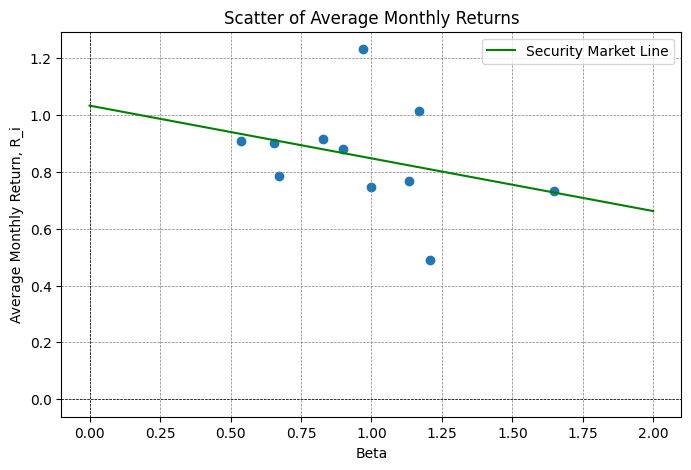

In [ ]:
# Generate SML
x = np.linspace(0, 2, 200)
y = model.coef_[0] * x + model.intercept_

# Plotting
plt.figure(figsize=(8, 5))
plt.title('Scatter of Average Monthly Returns')
plt.plot(x, y, label=f'Security Market Line', color='Green')
plt.xlabel('Beta')
plt.ylabel('Average Monthly Return, R_i')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.scatter(betas,monthly_mean_return)
plt.legend()
plt.show()



Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.)



Briefly explain the economic significance and pricing implications of the SML.

> answer:
>   SML shows that all appropriately-priced assets have same Treynor ratio ⇒ assets that lie above (or below) SML are underpriced (or overpriced)